<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-3-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
data.shape

(90, 18)

In [8]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [9]:
X.shape

(90, 83)

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
Y=data.Class.to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this 
transform = preprocessing.StandardScaler()

# Ajustar y transformar los datos
X_scaled= transform.fit_transform(X)

# Convertir el array escalado a un DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas del DataFrame escalado
print(X.head())

   FlightNumber   PayloadMass   Flights     Block  ReusedCount  Orbit_ES-L1  \
0     -1.712912 -1.948145e-16 -0.653913 -1.575895     -0.97344       -0.106   
1     -1.674419 -1.195232e+00 -0.653913 -1.575895     -0.97344       -0.106   
2     -1.635927 -1.162673e+00 -0.653913 -1.575895     -0.97344       -0.106   
3     -1.597434 -1.200587e+00 -0.653913 -1.575895     -0.97344       -0.106   
4     -1.558942 -6.286706e-01 -0.653913 -1.575895     -0.97344       -0.106   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
1     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
2     -0.106  -0.654654     -0.106   1.812654  ...     -0.185695   
3     -0.106  -0.654654     -0.106  -0.551677  ...     -0.185695   
4     -0.106   1.527525     -0.106  -0.551677  ...     -0.185695   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0     -0.215666     -0.185695        -

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

In [14]:
print(Y_train.shape, X_train.shape, X_test.shape)

(72,) (72, 83) (18, 83)


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [15]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}# l1 lasso l2 ridge

In [16]:
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [17]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
#estos hiperparametros afectan el entrenamiento para hayar los coeficientes más no se incluyen en la formula

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [18]:
# mejor modelo
best_model = logreg_cv.best_estimator_#es necesario el best estimator, para predecir valores no.
print(f'Coeficientes del mejor modelo: {best_model.coef_}')
print(f'Intercepto del mejor modelo: {best_model.intercept_}')
#

Coeficientes del mejor modelo: [[ 4.75735366e-02  2.35949858e-02 -6.10502372e-04  5.32668545e-02
   7.82962403e-02  2.38423116e-02  1.71126205e-02 -4.56175826e-02
   3.13256097e-07 -4.33292998e-04  3.40168043e-02 -7.02288991e-03
  -8.47037935e-04 -4.19200677e-02  2.39252615e-02  2.23847141e-02
  -2.43219319e-02  1.54289016e-02  1.48666237e-02  5.31746978e-02
   2.40825092e-02  5.12967145e-02  4.45521019e-07  2.68923997e-02
   3.13256097e-07 -3.21933385e-02 -3.00096840e-02  3.13256097e-07
  -2.86024928e-02 -2.86464472e-02  3.67440318e-02  3.44581543e-02
  -2.88418063e-02 -3.03962644e-02 -2.88636514e-02  3.13256097e-07
   2.38423116e-02  3.13256097e-07  3.13256097e-07 -5.48370195e-02
  -5.37364050e-02  2.28511225e-02 -5.22124048e-02  1.84992153e-02
   2.62174649e-02  3.13256097e-07  2.33841370e-02  3.13256097e-07
  -5.37398872e-02  1.69614093e-02 -3.21876371e-02  3.07999014e-02
   3.13531431e-02 -3.23271454e-02  3.02186451e-02  3.75995406e-02
  -3.25193080e-02  3.13256097e-07 -2.67368040

logit(p)=Intercepto+β1X1+β2X2+⋯+βnXn

Y la probabilidad:

𝑝 = 1/(1+exp(−(Intercepto+β1X1+β2X2+⋯+βnXn))1)

esto arroja la probabilidad de que Y sea = 1 es decir que sea class 1 atterrizaje exitoso en este caso si es mayor a 0,5 el modelo arroja 1 de lo contrario 0

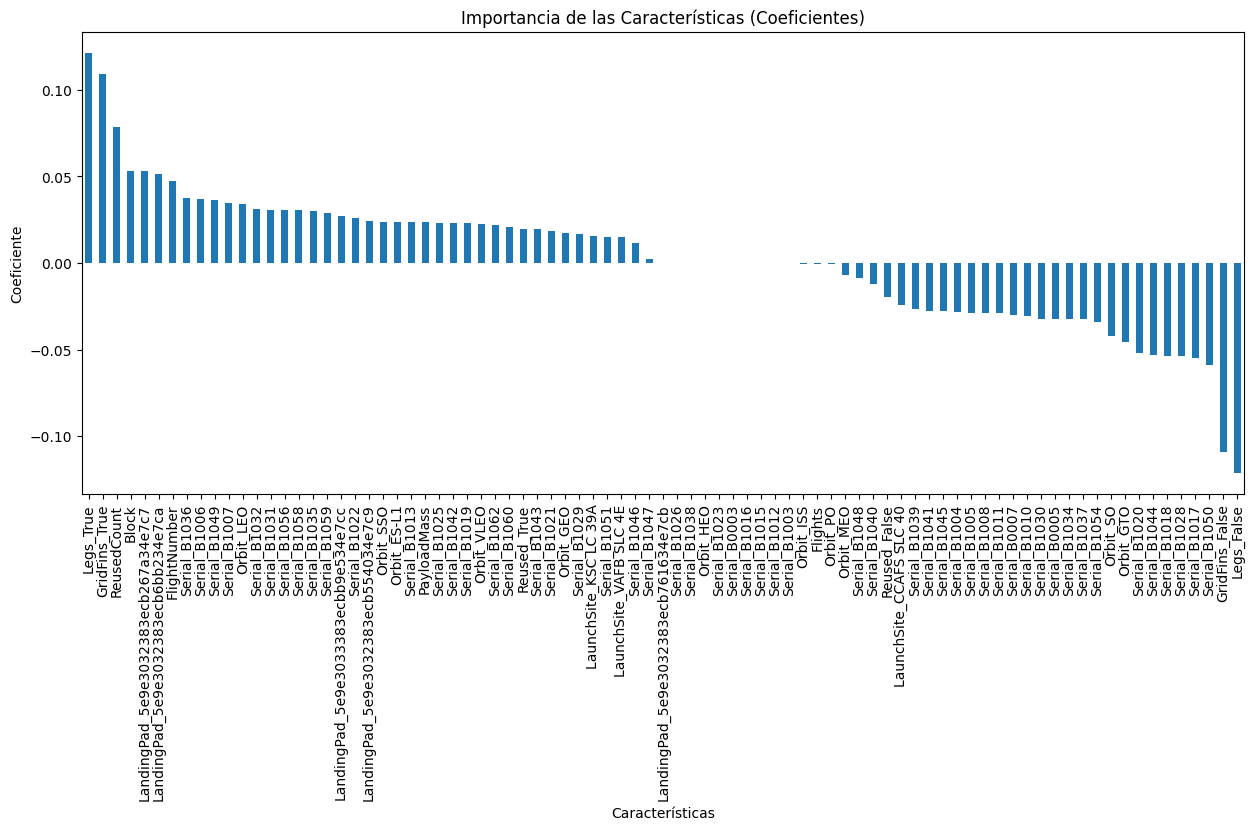

In [19]:
# Obtener los nombres de las características
feature_names = X.columns
coef = best_model.coef_
intercept = best_model.intercept_
# Crear un DataFrame para los coeficientes
coef_df = pd.DataFrame(coef.T, columns=['Coeficiente'], index=feature_names)
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)
# Graficar los coeficientes
plt.figure(figsize=(15, 6))
coef_df['Coeficiente'].plot(kind='bar')
plt.title('Importancia de las Características (Coeficientes)')
plt.xlabel('Características')
plt.ylabel('Coeficiente')
plt.xticks(rotation=90)
plt.show()

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
from sklearn.metrics import accuracy_score
yhat=logreg_cv.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, yhat)
LR_Accuracy

0.8333333333333334

Lets look at the confusion matrix:


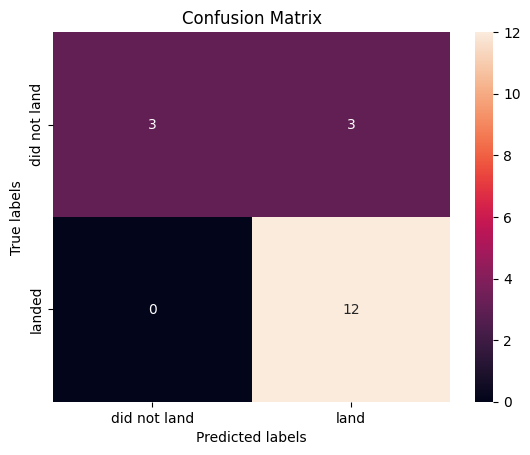

In [21]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [23]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [24]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [25]:
yhat1=svm_cv.predict(X_test)
SVM_Accuracy = accuracy_score(Y_test, yhat1)
SVM_Accuracy

0.8333333333333334

We can plot the confusion matrix


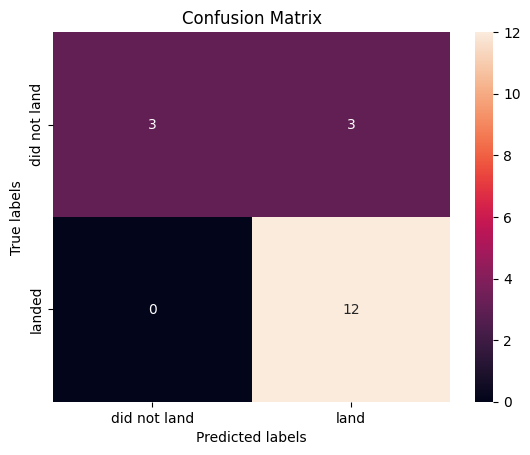

In [26]:
yhat1=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat1)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [28]:
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)

/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [29]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8625


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
yhat=tree_cv.predict(X_test)
TREE_Accuracy = accuracy_score(Y_test, yhat)
TREE_Accuracy

0.8333333333333334

We can plot the confusion matrix


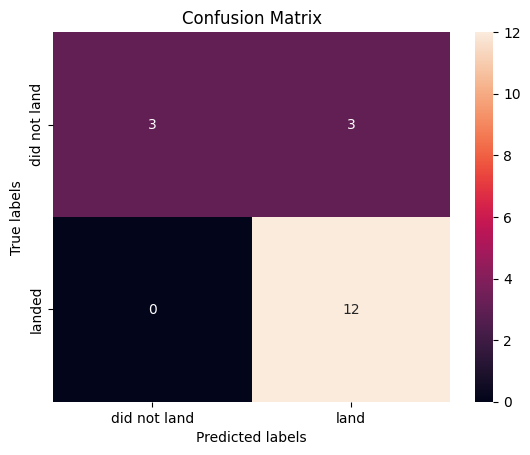

In [31]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [32]:
# Obtener la importancia de las características usando el mejor modelo del grid search
importances = tree_cv.best_estimator_.feature_importances_ #Es necesario el best estimator
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de las características:")
print(feature_importance_df)


Importancia de las características:
                  Feature  Importance
77         GridFins_False    0.809550
3                   Block    0.059843
17  LaunchSite_KSC LC 39A    0.051811
15             Orbit_VLEO    0.038111
74           Serial_B1059    0.016457
..                    ...         ...
31           Serial_B1007    0.000000
30           Serial_B1006    0.000000
29           Serial_B1005    0.000000
28           Serial_B1004    0.000000
82              Legs_True    0.000000

[83 rows x 2 columns]


GridFins_True tiene una importancia de 0.634934:

Esto significa que GridFins_True es la característica más importante en tu modelo, contribuyendo con aproximadamente el 63.49% a la toma de decisiones del modelo.
PayloadMass tiene una importancia de 0.099532:

Esto indica que PayloadMass tiene una importancia relativamente menor en comparación con GridFins_True, contribuyendo con aproximadamente el 9.95% a la toma de decisiones del modelo.
Serial_B1017, Serial_B1020, y Serial_B1041 tienen importancias menores (0.084210, 0.075472, y 0.037056, respectivamente):

Estas características tienen un impacto aún menor en las decisiones del modelo en comparación con GridFins_True y PayloadMass.
Uso de la Información de Importancia de Características
Priorización de Características: Puedes usar esta información para enfocarte en las características más importantes, simplificando el modelo o entendiendo mejor los factores que más influyen en las predicciones.

Reducción de Dimensionalidad: Puedes considerar eliminar características con baja importancia si estás buscando reducir la dimensionalidad del modelo y simplificar el análisis.

Interpretación de Resultados: La importancia de las características te ayuda a interpretar cómo y por qué el modelo toma decisiones específicas, proporcionando información valiosa sobre la relación entre las características y la variable objetivo.

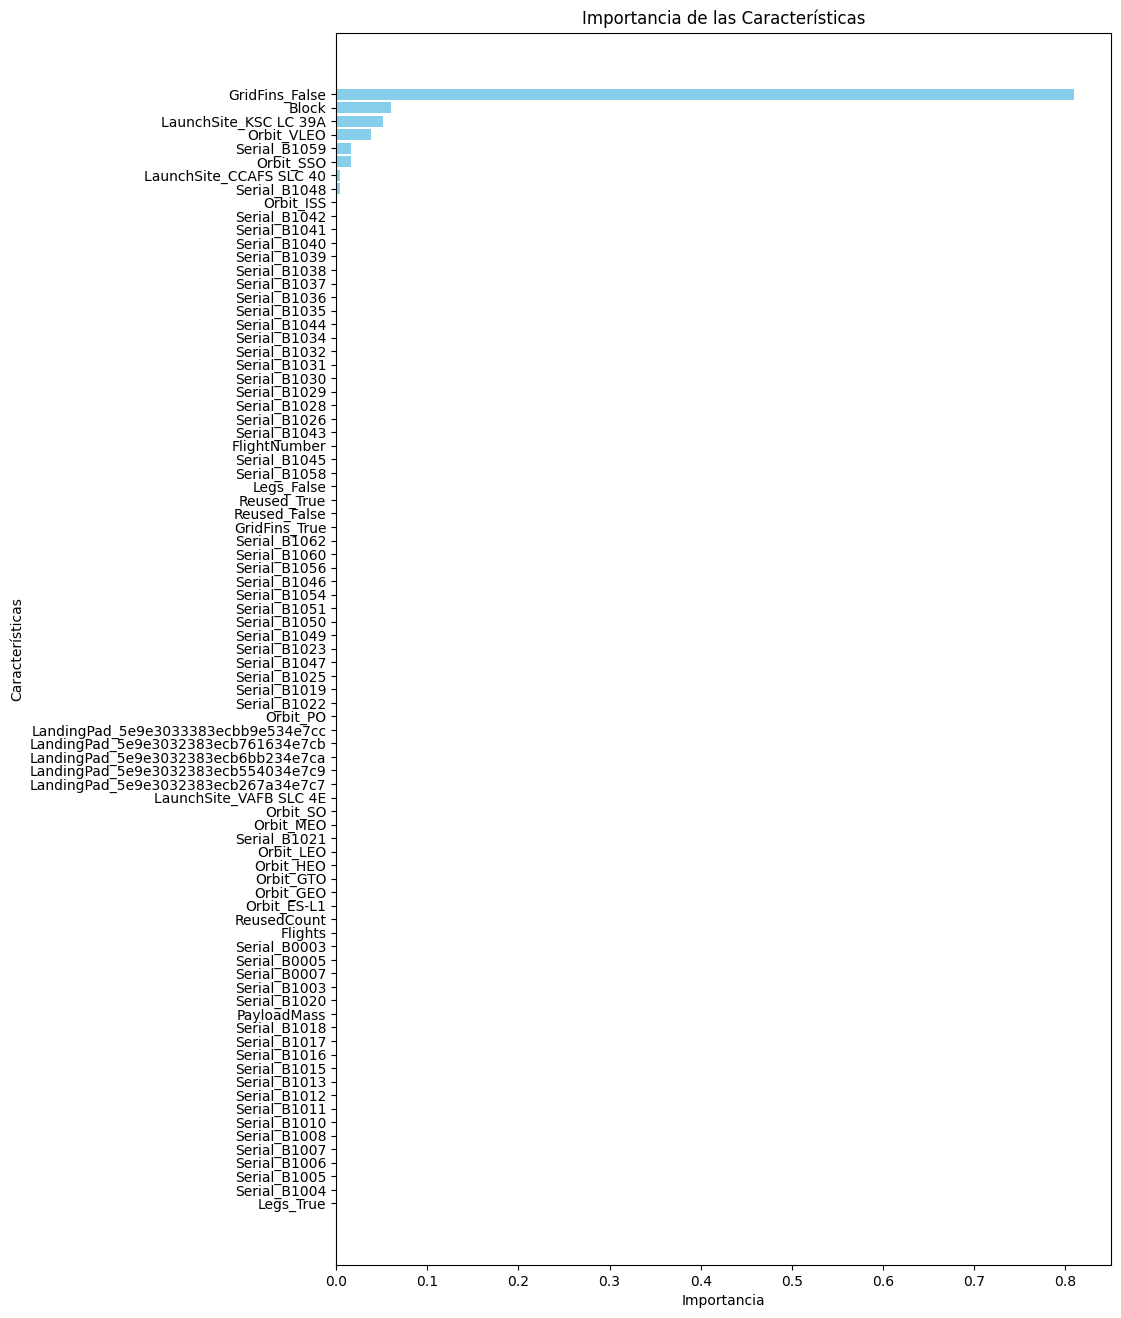

In [33]:
import matplotlib.pyplot as plt

# Suponiendo que `feature_importance_df` es el DataFrame que contiene tus importancias de características
plt.figure(figsize=(10, 16))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()  # Para que la característica más importante esté en la parte superior
plt.show()
#Note que poor ejemplo podria agrupar todas las series que no son representativas en una nueva categoria otas series

In [34]:
# Hacer predicciones usando tree_cv
yhat = tree_cv.predict(X_test)
TREE_Accuracy = accuracy_score(Y_test, yhat)
print(f'Precisión del modelo usando tree_cv: {TREE_Accuracy:.2f}')

# Hacer predicciones usando el mejor modelo encontrado
yhat1 = tree_cv.best_estimator_.predict(X_test)
TREE_Accuracy1 = accuracy_score(Y_test, yhat1)
print(f'Precisión del mejor modelo encontrado: {TREE_Accuracy1:.2f}')
#Note que en este caso no es necesario usar best estimator el resultado es el mismo

Precisión del modelo usando tree_cv: 0.83
Precisión del mejor modelo encontrado: 0.83


## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [35]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [36]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [37]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_) 

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [38]:
yhat1=knn_cv.predict(X_test)
KNN_Accuracy = accuracy_score(Y_test, yhat1)
KNN_Accuracy

0.8333333333333334

We can plot the confusion matrix


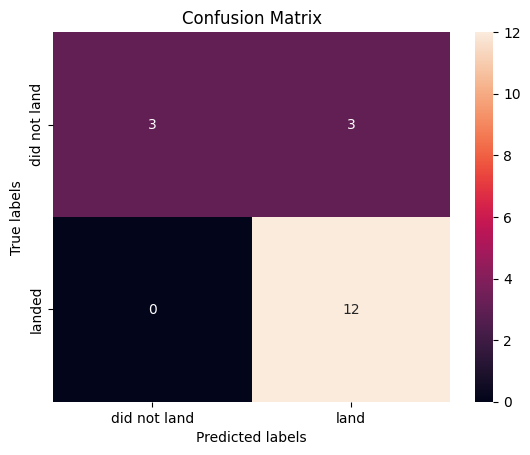

In [39]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


All the models have the same accuracy on test data, but the ree model has the best accuracy in train data = 0.8892857142857145, then I chose it.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>


In [40]:
print(KNN_Accuracy)
print(TREE_Accuracy)
print(SVM_Accuracy)
print(LR_Accuracy)
print(knn_cv.best_score_) 
print(tree_cv.best_score_)
print(svm_cv.best_score_) 
print(logreg_cv.best_score_)

0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334


In [41]:
print(knn_cv.best_score_) 
print(tree_cv.best_score_)
print(svm_cv.best_score_) 
print(logreg_cv.best_score_)

0.8482142857142858
0.8625
0.8482142857142856
0.8464285714285713


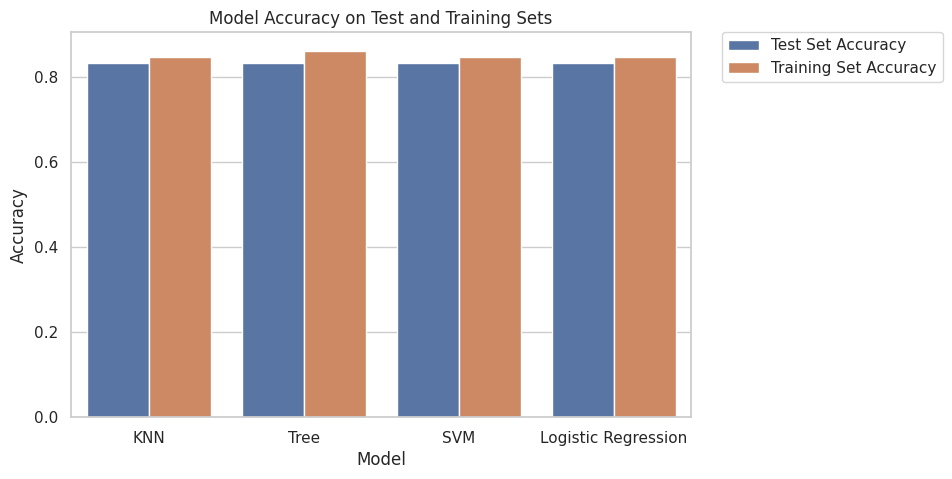

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

knn_cv_best_score = knn_cv.best_score_
tree_cv_best_score = tree_cv.best_score_
svm_cv_best_score = svm_cv.best_score_
logreg_cv_best_score = logreg_cv.best_score_

# Crear un diccionario con los datos
data_accuracy = {
    'Model': ['KNN', 'Tree', 'SVM', 'Logistic Regression'],
    'Test Set Accuracy': [KNN_Accuracy, TREE_Accuracy, SVM_Accuracy, LR_Accuracy],
    'Training Set Accuracy': [knn_cv_best_score, tree_cv_best_score, svm_cv_best_score, logreg_cv_best_score]
}

# Crear el DataFrame
daccuracy = pd.DataFrame(data_accuracy)

# Derretir el DataFrame para que sea más fácil de graficar con seaborn
df_melted = daccuracy.melt(id_vars='Model', var_name='Set', value_name='Accuracy')

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Model', y='Accuracy', hue='Set', data=df_melted)

# Añadir etiquetas y título
plt.title('Model Accuracy on Test and Training Sets')
plt.ylabel('Accuracy')
plt.xlabel('Model')

# Mover la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Mostrar el gráfico
plt.show()
